# Homework #4

In [1]:
# Some code structure taken from class code along on 11/05/2020

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import datetime as dt

%matplotlib inline

## 1. Read in and Wrangle Returns Data

In [2]:
# Import .csv files

algodf = pd.read_csv('algo_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500df = pd.read_csv('sp500_history.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
whaledf = pd.read_csv('whale_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)

In [3]:
# Clean up algodf

algodf = algodf.dropna().copy()
algodf = algodf.sort_index()
algodf

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [4]:
# Clean up sp500df and change to percent change

sp500df['Close'] = sp500df['Close'].str.replace("$","")
sp500df['Close'] = sp500df['Close'].astype('float')
sp500df = sp500df.sort_index()
sp500df = sp500df.pct_change()
sp500df = sp500df.dropna().copy()
sp500df = sp500df.rename(columns={'Close':'SP500'})
sp500df

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [5]:
# Clean up whaledf

whaledf = whaledf.dropna().copy()
whaledf = whaledf.sort_index()
whaledf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
# Combine the three dfs into one

combineddf = pd.concat([algodf, sp500df, whaledf], axis='columns', join='inner')
combineddf

,Algo 1,Algo 2,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,-0.004389,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,0.001196,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,0.003944,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-16,-0.006945,0.002899,0.000509,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.010301,-0.005228,-0.002274,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,-0.000588,-0.001229,0.001579,0.001448,0.001222,0.000582,0.001916


## 2. Determine Success of Each Portfolio

### Performance Analysis

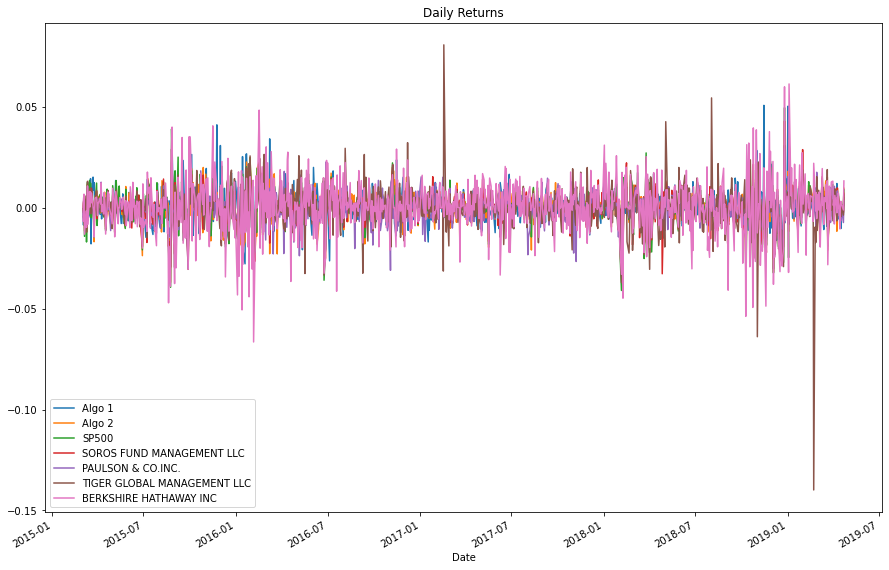

In [7]:
# Plot daily returns

combineddf.plot(figsize=(15,10), title='Daily Returns');

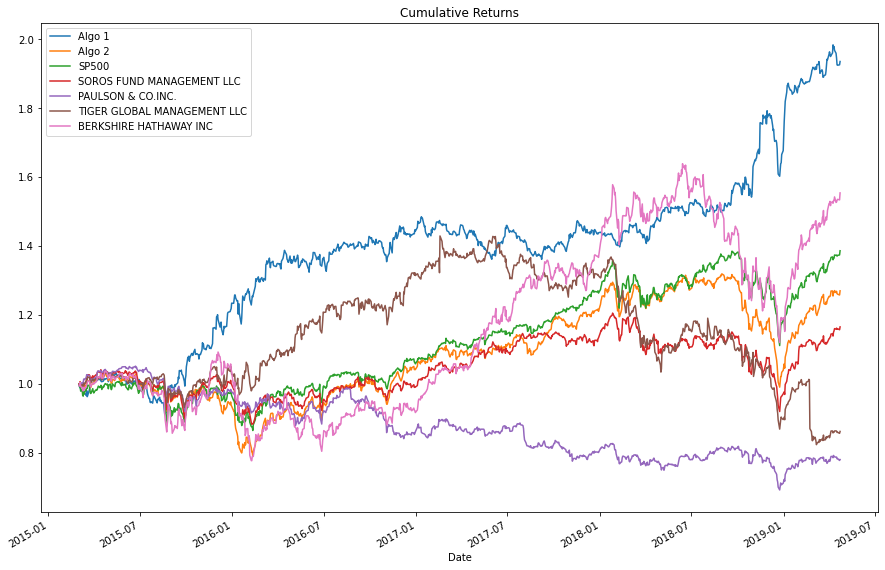

In [8]:
# Calculate and plot Cumulative returns

cumulative = (1 + combineddf).cumprod()
cumulative.plot(figsize=(15,10), title='Cumulative Returns');

Does any portfolio outperform the S&P 500?  Yes, both Algo 1 and Berkshire Hathaway Inc outperform the S&P 500

### Risk Analysis

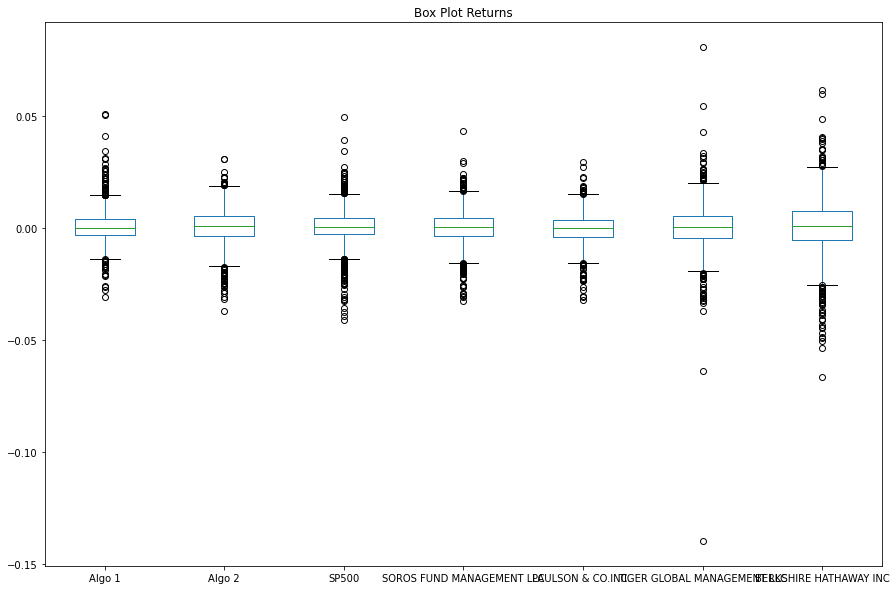

In [9]:
# Create box plot for each return

combineddf.plot.box(figsize=(15,10), title='Box Plot Returns');

Which Box has the largest spread? Tiger Global Management has the largest spread, given the outliers.
Which has the smallest spread? Algo 2 and Paulson & Co appear to have similar small spreads.

In [10]:
# Calculate STD

combineddf.std().sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

Which portfolios are riskier than the S&P 500?  Tiger Global Management and Berkshire Hathaway are significantly riskier than the S&P 500.

In [11]:
# Calculate annualized STD

annualstd = combineddf.std()*np.sqrt(252)
annualstd

Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

### Rolling Statistics

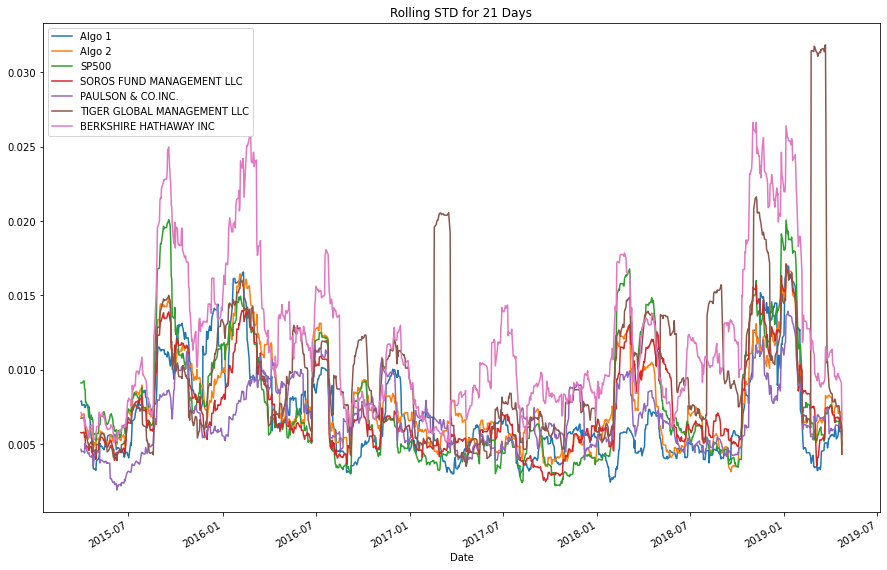

In [12]:
# Rolling STD for 21 days

rollingstd = combineddf.rolling(window=21).std()

rollingstd.plot(figsize=(15,10), title='Rolling STD for 21 Days');

Does the risk increase for each of the portfolios at the same time risk increases in the S&P? Generally, the portfolios' risk appears to match the movement of risk in the S&P.  Tiger Global Management does have two large spikes that do not appear to be explained by the movement of the S&P.

In [13]:
# Making correlation table

correlation = combineddf.corr()
correlation.style.background_gradient(cmap='twilight')

,Algo 1,Algo 2,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Algo 1,1.000000,0.288243,0.279494,0.321211,0.268840,0.164387,0.292033
Algo 2,0.288243,1.000000,0.858764,0.826873,0.678152,0.507414,0.688082
SP500,0.279494,0.858764,1.000000,0.837864,0.669732,0.623946,0.751371
SOROS FUND MANAGEMENT LLC,0.321211,0.826873,0.837864,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.268840,0.678152,0.669732,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.164387,0.507414,0.623946,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.292033,0.688082,0.751371,0.754360,0.545623,0.424423,1.000000


Which returns most closely mimic the S&P?  Algo 2 and Soros Fund Management most closely mimic the S&P.

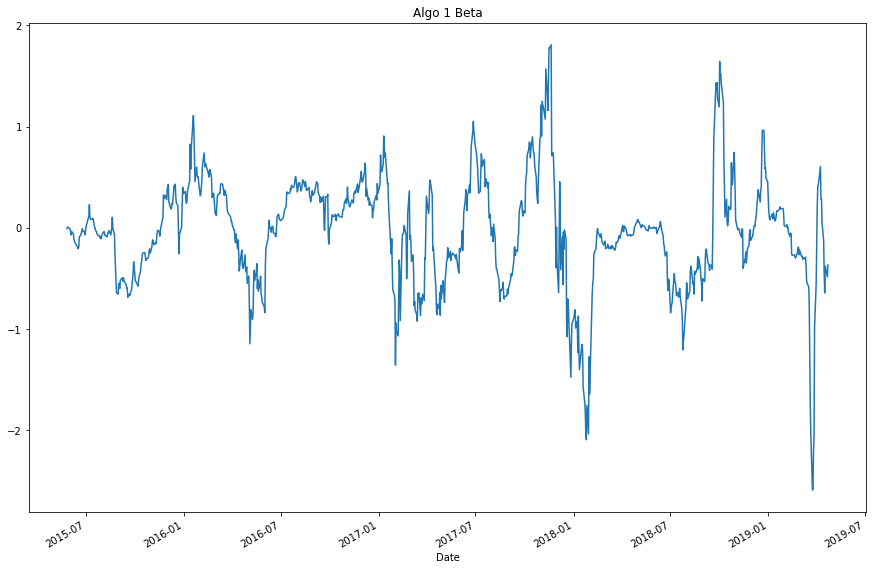

In [14]:
# Calculate the Beta of Algo 1

#calculate covariance of Algo 1
covariance = combineddf['Algo 1'].rolling(window=60).cov(cumulative['SP500'])

#variance of general market
variance = combineddf['SP500'].rolling(window=60).var()

#Beta

beta = covariance/variance

beta.plot(figsize=(15,10), title='Algo 1 Beta');

Does the portfolio seem sensitive to the movements in the S&P 500?  Yes, Algo 1 appears very sensitive to the movements of the S&P 500.

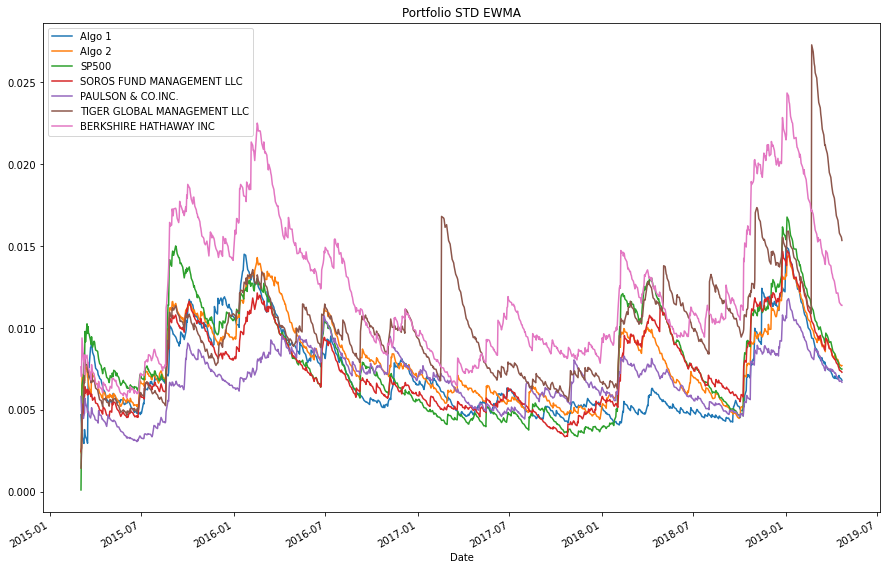

In [15]:
# Exponential Weighted Moving Average (21 day half life)

combineddf.ewm(halflife=21).std().plot(figsize=(15,10), title='Portfolio STD EWMA');

### Plot Sharpe Ratios

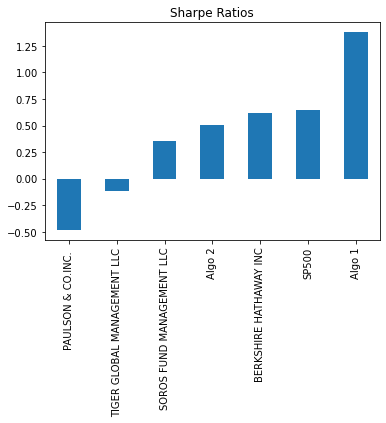

In [16]:
# Calculate annual sharpe ratios and create bar plot

sharperatio = (combineddf.mean()*252) / (combineddf.std()* np.sqrt(252))
sharperatio.sort_values().plot(kind='bar', title='Sharpe Ratios');

Determine whether the algorithmic strategies outperform both the market and the whales' portfolios?  Algo 1 outperforms both the market and all the whales' portfolios.  Algo 2 does not outperform the market, but does outperform the whales' portfolios (except Berkshire Hathaway).

## 3. Choose and Evaluate a Custom Portfolio

In [17]:
#Read in stock csvs (from Google Finance)

AMZNdf = pd.read_csv('AMZN_historical.csv',index_col='Date', infer_datetime_format=True, parse_dates=True)
NFLXdf = pd.read_csv('NFLX_historical.csv',index_col='Date', infer_datetime_format=True, parse_dates=True)
PFEdf = pd.read_csv('PFE_historical.csv',index_col='Date', infer_datetime_format=True, parse_dates=True)
TSLAdf = pd.read_csv('TSLA_historical.csv',index_col='Date', infer_datetime_format=True, parse_dates=True)

In [18]:
# Remove time from date columns [source: https://stackoverflow.com/questions/50845338/remove-time-portion-of-datetime-index-in-pandas]

AMZNdf.index = AMZNdf.index.date
NFLXdf.index = NFLXdf.index.date
PFEdf.index = PFEdf.index.date
TSLAdf.index = TSLAdf.index.date

In [19]:
# Combine into a single dataframe

portfolio = pd.concat([AMZNdf['Close'],NFLXdf['Close'],PFEdf['Close'],TSLAdf['Close']], axis='columns', join='inner')
portfolio.columns = ['AMZN', 'NFLX', 'PFE', 'TSLA']
portfolio.head()

,AMZN,NFLX,PFE,TSLA
2015-03-03,384.61,67.82,34.56,39.91
2015-03-04,382.72,67.11,34.64,40.49
2015-03-05,387.83,66.81,34.47,40.13
2015-03-06,380.09,64.87,33.97,38.78
2015-03-09,378.56,63.66,34.03,38.18


In [20]:
# Assign weights (Equal per instructions)

weights = [0.25,0.25,0.25,0.25]


In [21]:
# Create single percent change dataframe and drop NAs

returnsdf = portfolio.pct_change()
returnsdf = returnsdf.dropna().copy()

In [22]:
#Calculate weighted returns

weighteddf = (weights * returnsdf)

In [23]:
#Portfolio weighted return

weighteddf['Byrd'] = weighteddf['AMZN']+weighteddf['NFLX']+weighteddf['PFE']+weighteddf['TSLA']
weighteddf

,AMZN,NFLX,PFE,TSLA,Byrd
2015-03-04,-0.001229,-0.002617,0.000579,0.003633,0.000366
2015-03-05,0.003338,-0.001118,-0.001227,-0.002223,-0.001229
2015-03-06,-0.004989,-0.007259,-0.003626,-0.008410,-0.024285
2015-03-09,-0.001006,-0.004663,0.000442,-0.003868,-0.009096
2015-03-10,-0.005977,-0.005930,-0.001837,-0.000786,-0.014529
...,...,...,...,...,...
2019-04-15,0.000246,-0.001616,0.002278,-0.001214,-0.000307
2019-04-16,0.002462,0.007589,-0.006949,0.006522,0.009624
2019-04-17,0.000239,-0.003283,-0.006354,-0.001921,-0.011318
2019-04-18,-0.000420,0.003954,-0.003134,0.001843,0.002243


In [24]:
# Drop unneeded columns

weighteddf = weighteddf.drop(columns=['AMZN','NFLX','PFE','TSLA'])
weighteddf

,Byrd
2015-03-04,0.000366
2015-03-05,-0.001229
2015-03-06,-0.024285
2015-03-09,-0.009096
2015-03-10,-0.014529
...,...
2019-04-15,-0.000307
2019-04-16,0.009624
2019-04-17,-0.011318
2019-04-18,0.002243


In [25]:
# Join my portfolio back with the orginal porfolio dataframe

finaldf = pd.concat([combineddf, weighteddf], axis='columns', join='inner')
finaldf

,Algo 1,Algo 2,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Byrd
2015-03-04,-0.008589,0.002416,-0.004389,0.002230,0.003241,-0.002534,0.004213,0.000366
2015-03-05,-0.000955,0.004323,0.001196,0.004016,0.004076,0.002355,0.006726,-0.001229
2015-03-06,-0.004957,-0.011460,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.024285
2015-03-09,-0.005447,0.001303,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.009096
2015-03-10,-0.001392,-0.012155,-0.016961,-0.010263,-0.005341,-0.012079,-0.009739,-0.014529
...,...,...,...,...,...,...,...,...
2019-04-15,-0.004331,-0.004572,-0.000629,-0.001422,-0.001156,0.000398,-0.010492,-0.000307
2019-04-16,-0.006945,0.002899,0.000509,0.002699,0.000388,-0.000831,0.000837,0.009624
2019-04-17,-0.010301,-0.005228,-0.002274,-0.002897,-0.006467,-0.004409,0.003222,-0.011318
2019-04-18,-0.000588,-0.001229,0.001579,0.001448,0.001222,0.000582,0.001916,0.002243


In [26]:
# Calculate STD

finaldf.std().sort_values()

PAULSON & CO.INC.              0.007027
Algo 1                         0.007626
SOROS FUND MANAGEMENT LLC      0.007900
Algo 2                         0.008345
SP500                          0.008557
TIGER GLOBAL MANAGEMENT LLC    0.010903
BERKSHIRE HATHAWAY INC         0.012923
Byrd                           0.015145
dtype: float64

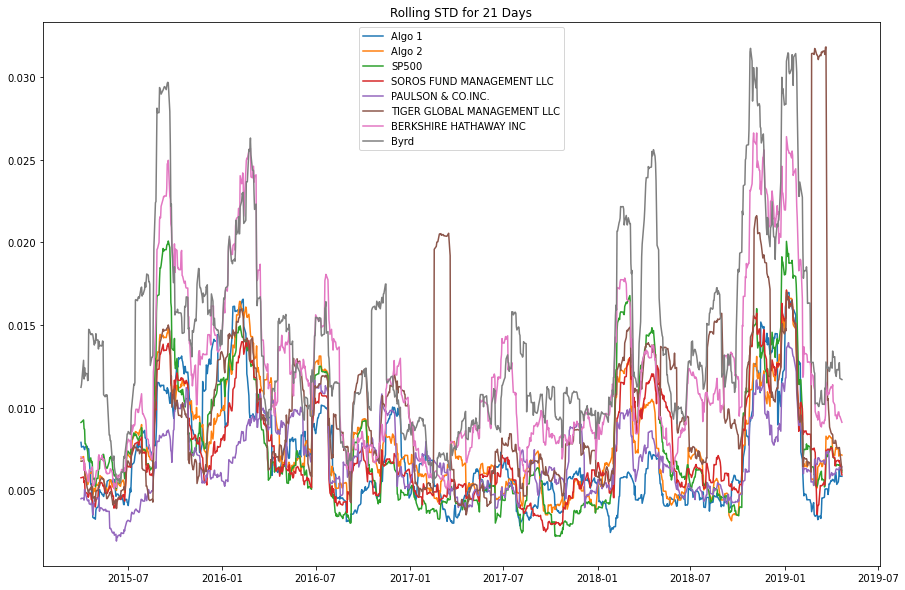

In [27]:
# Rolling STD for 21 days

modrollingstd = finaldf.rolling(window=21).std()

modrollingstd.plot(figsize=(15,10), title='Rolling STD for 21 Days');

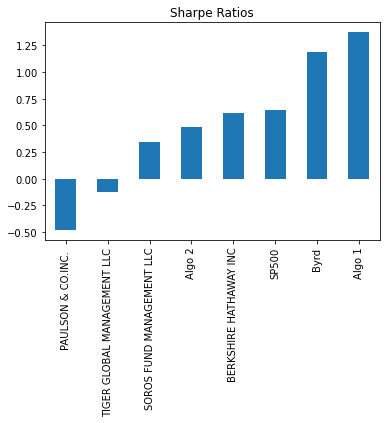

In [28]:
# Calculate annual sharpe ratios and create bar plot

modsharperatio = (finaldf.mean()*252) / (finaldf.std()* np.sqrt(252))
modsharperatio.sort_values().plot(kind='bar', title='Sharpe Ratios');

In [29]:
# Making correlation table

modcorrelation = finaldf.corr()
modcorrelation.style.background_gradient(cmap='twilight')

,Algo 1,Algo 2,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Byrd
Algo 1,1.000000,0.287823,0.279002,0.320864,0.268483,0.164111,0.291557,0.253686
Algo 2,0.287823,1.000000,0.858683,0.826726,0.678147,0.507161,0.687785,0.595654
SP500,0.279002,0.858683,1.000000,0.837776,0.669517,0.623853,0.751062,0.701099
SOROS FUND MANAGEMENT LLC,0.320864,0.826726,0.837776,1.000000,0.699870,0.561043,0.754182,0.624740
PAULSON & CO.INC.,0.268483,0.678147,0.669517,0.699870,1.000000,0.434380,0.545294,0.496906
TIGER GLOBAL MANAGEMENT LLC,0.164111,0.507161,0.623853,0.561043,0.434380,1.000000,0.424166,0.410941
BERKSHIRE HATHAWAY INC,0.291557,0.687785,0.751062,0.754182,0.545294,0.424166,1.000000,0.725850
Byrd,0.253686,0.595654,0.701099,0.624740,0.496906,0.410941,0.725850,1.000000


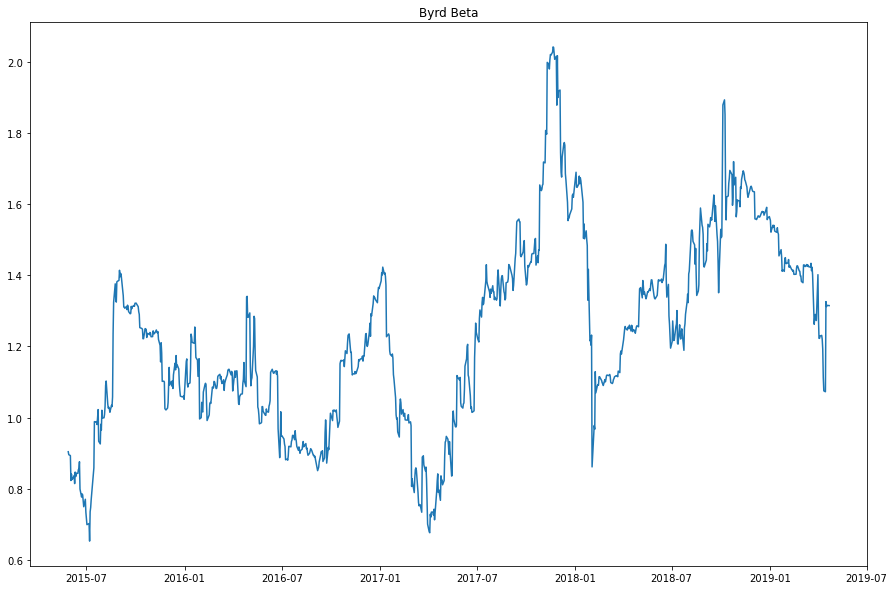

In [30]:
# Calculate the Beta of Byrd vs SP500

#calculate covariance of Byrd
modcovariance = finaldf['Byrd'].rolling(window=60).cov(finaldf['SP500'])

#variance of general market
modvariance = finaldf['SP500'].rolling(window=60).var()

#Beta

modbeta = modcovariance/modvariance

modbeta.plot(figsize=(15,10), title='Byrd Beta');

How does your portfolio fair?  My portfolio has a larger STD and therefore is riskier than the other funds and algos, but also gives a potential for a larger retrun.  The Sharpe Ratio is higher than all the funds, except for Algo 1, showing it has a high ratio of return for the risk.  It is highly correlated with the S&P and Berkshire Hathaway.  Finally, the Beta versus the S&P 500 shows it is very positively correlated to the market.